## ZERO ACCESS CYBER ATTACK

In [9]:
# import packages and libraries

import folium
import reverse_geocoder
import seaborn
import sklearn
import imblearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the datasets files
zeroaccess_df = pd.read_csv("zeroaccess.csv")
state_df = pd.read_csv("state-internets.csv")
county_df = pd.read_csv("county-data.csv")

In [3]:
#print the shape of the datasets
print(zeroaccess_df.shape, state_df.shape, county_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [4]:
#print the head of the data
print(zeroaccess_df.head())
print(state_df.head())
print(county_df.head())

       lat     long
0 -10.0000 -55.0000
1  38.0888 -78.5592
2  38.9990 -84.6266
3  48.6210   7.4944
4  43.2342 -86.2484
        state  population  internet
0     Alabama     4758191   3092273
1     Arizona     6665093   5230474
2    Arkansas     2919815   1949869
3  California    37350092  29758896
4    Colorado     5077553   4058749
   subregion          region     pop  income   ipaddr  ufo2010
0  abbeville  south carolina   25101   34670    30330        2
1     acadia       louisiana   61912   37970    38203        6
2   accomack        virginia   33341   41595    41338        2
3        ada           idaho  409061   55304  1035427       59
4      adair            iowa    7481   47623     3762        0


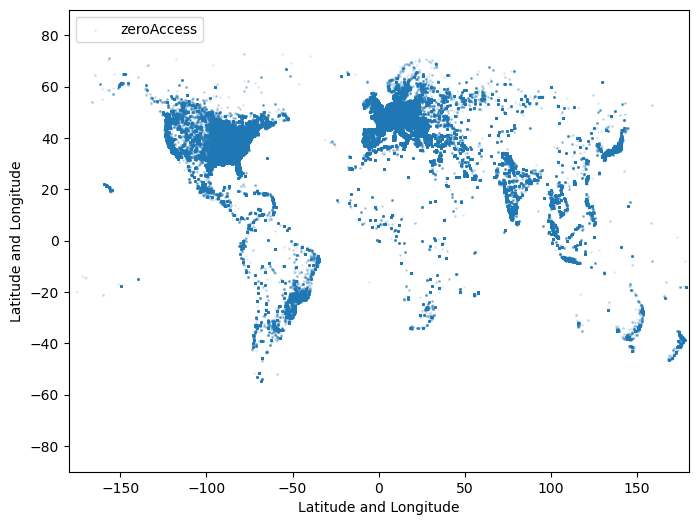

In [5]:
#plot the ZeroAccess infection instances on an instance of the world map.
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

ax.scatter(zeroaccess_df.long, zeroaccess_df.lat, alpha=0.1, s=1, label="zeroAccess")
ax.set_xlim((-180,180))
ax.set_ylim((-90,90))

plt.xlabel("Latitude and Longitude")
plt.ylabel("Latitude and Longitude")
plt.legend(loc="upper left")

plt.show()

In [6]:
#produce heatmap of the world based on the infection rate
from folium.plugins import HeatMap
mapa = folium.Map(location=(10,10),zoom_start=1.5,tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip(list(zeroaccess_df.lat),(zeroaccess_df.long)))[:10000]
HeatMap(loc_li,radius=15).add_to(mapa)
mapa

In [7]:
#batch implementation  getting only the first 50000 rows and printing the dataframe
def rgr_batch(lat_long_df):
    cord_li = []
    for ind in lat_long_df.index:
        cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
    result_dict_li = reverse_geocoder.search(cord_li)
    return pd.DataFrame(result_dict_li).drop(['lat', 'lon'], axis = 1)

sample_df = zeroaccess_df.head(50000)
country_df = rgr_batch(sample_df)
df=sample_df.join(country_df).rename(columns={'name':'City', 'admin1':'State','admin2':'County','cc':'country_code',})
df

Loading formatted geocoded file...


lat     long             City               State  \
0     -10.0000 -55.0000    Alta Floresta         Mato Grosso   
1      38.0888 -78.5592  Charlottesville            Virginia   
2      38.9990 -84.6266         Florence            Kentucky   
3      48.6210   7.4944       Marlenheim              Alsace   
4      43.2342 -86.2484         Muskegon            Michigan   
...        ...      ...              ...                 ...   
49995  53.1271  18.0200        Bydgoszcz  Kujawsko-Pomorskie   
49996  42.6757 -82.7773    New Baltimore            Michigan   
49997  43.5417  21.7078        Aleksinac      Central Serbia   
49998  28.2397 -82.7388  New Port Richey             Florida   
49999  29.7633 -95.3633          Houston               Texas   

                        County country_code  
0                Alta Floresta           BR  
1      City of Charlottesville           US  
2                 Boone County           US  
3      Departement du Bas-Rhin           FR  
4              Muskegon County           US  
...                        ...          ...  
49995                Bydgoszcz           PL  
49996            Macomb County           US  
49997           Nisavski Okrug           RS  
49998             Pasco County           US  
49999            Harris County           US  

[50000 rows x 6 columns]

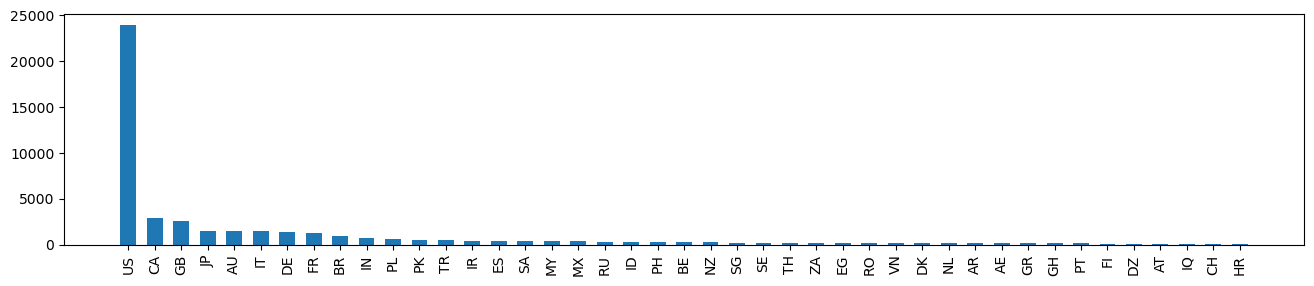

In [8]:
#plot figure of the number of attacks in each country

country_num = df.groupby(['country_code']).size().sort_values(ascending=False)
country_num = country_num[country_num.values>100]
plt.figure(figsize=(16,3))
plt.bar(country_num.index, country_num.values, width=0.6)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
#plot figure of the percentage of attacks in each country

country_counts = df['country_code'].value_counts(normalize=True)
country_counts = country_counts[country_counts.values>0.01]

plt.figure(figsize=(16,3))
plt.bar(country_counts.index, country_counts.values, width=0.6)
plt.xticks(rotation='vertical')
plt.show()

country_counts

US    0.47974
CA    0.05932
GB    0.05128
JP    0.03008
AU    0.03002
IT    0.02964
DE    0.02824
FR    0.02622
BR    0.01928
IN    0.01496
PL    0.01154
PK    0.01096
TR    0.01052
Name: country_code, dtype: float64

In [10]:
#create a dataframe for the US
us_df = df[df['country_code']=='US']
us_df

lat      long             City         State  \
1      38.0888  -78.5592  Charlottesville      Virginia   
2      38.9990  -84.6266         Florence      Kentucky   
4      43.2342  -86.2484         Muskegon      Michigan   
6      44.8012  -68.7778           Bangor         Maine   
8      36.0580  -88.8253         Bradford     Tennessee   
...        ...       ...              ...           ...   
49992  40.6374  -79.7264     Brackenridge  Pennsylvania   
49994  38.4380 -122.6753       Santa Rosa    California   
49996  42.6757  -82.7773    New Baltimore      Michigan   
49998  28.2397  -82.7388  New Port Richey       Florida   
49999  29.7633  -95.3633          Houston         Texas   

                        County country_code  
1      City of Charlottesville           US  
2                 Boone County           US  
4              Muskegon County           US  
6             Penobscot County           US  
8                Gibson County           US  
...                        ...          ...  
49992         Allegheny County           US  
49994            Sonoma County           US  
49996            Macomb County           US  
49998             Pasco County           US  
49999            Harris County           US  

[23987 rows x 6 columns]

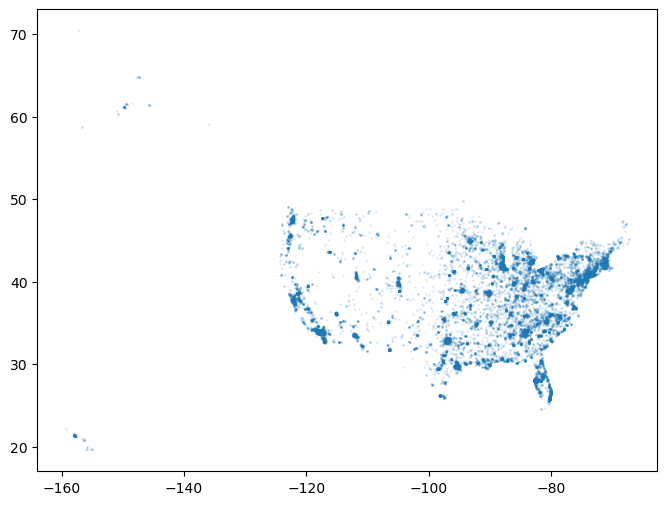

In [11]:
#plot zeroAccess infection instances on US map
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.scatter(us_df.long,us_df.lat, alpha=0.1, s=1)
plt.show()

In [12]:
#show the count for individual stats with more than 30 infections
df.State.value_counts()[df.State.value_counts()>30]

England          2297
California       2293
Texas            2003
Florida          1425
Kansas           1371
                 ... 
Grad Zagreb        31
Shizuoka           31
Northern Cape      31
Vermont            31
Calabria           31
Name: State, Length: 215, dtype: int64

In [13]:
#show the values of cities grouped with their states in descending order
df.groupby(['State','City']).size().sort_values(ascending=False)

State               City                 
Kansas              Peabody                  1152
England             London                    453
Tokyo               Tokyo                     427
Islamabad           Islamabad                 319
England             City of London            300
                                             ... 
Nord-Pas-de-Calais  Lens                        1
                    Lambersart                  1
                    Lallaing                    1
                    La Bassee                   1
Midi-Pyrenees       Montesquieu-Volvestre       1
Length: 13138, dtype: int64

In [14]:
#using the county dataset for the prediction of attack counts by state using linear regression

county_df=pd.read_csv('county-data.csv')
county=county_df.groupby('subregion').sum()
a= pd.Series(np.random.rand(1774))
b= pd.Series(np.random.rand(1774))
c= pd.Series(np.random.rand(1774))
d= pd.Series(county.index)
temp={'attack':a,'att_pc': b, 'pop_pc': c, 'subregion': d}
att_pop=pd.DataFrame(temp)
county1=county.merge(att_pop, left_on='subregion', right_on='subregion') #, left_index=True,right_index=True)
county1 = county1.set_index('subregion')

#create a correlation matrix showing correlation coefficients between variables.
co_matrix= county1.corr(numeric_only=True)
co_matrix.style.background_gradient( )

C:\Users\donsc\AppData\Local\Temp\ipykernel_32568\1504063808.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county=county_df.groupby('subregion').sum()


In [15]:
#define axis and run a linear regression on the data

X_train = county1.drop(['attack'],axis=1)
y_train = county1['attack']

from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)


LinearRegression()

In [16]:
#print the intercept and coefficients
print("Intercept is", linearRegModel.intercept_)
print("coefficients is", linearRegModel.coef_)

#print with feature name

print()
print("attack =")
for c,f in zip(linearRegModel.coef_, X_train.columns):
    print(' {0:+} * {1}'.format(c,f))
print("",linearRegModel.intercept_)

Intercept is 0.49595345564020543
coefficients is [-3.43221565e-08  8.22605074e-08 -1.16336786e-09  1.66391875e-04
  3.87012129e-03  3.33504568e-02]

attack =
 -3.432215645721216e-08 * pop
 +8.226050738365513e-08 * income
 -1.1633678577697282e-09 * ipaddr
 +0.0001663918752977148 * ufo2010
 +0.0038701212927911665 * att_pc
 +0.0333504567788825 * pop_pc
 0.49595345564020543


In [17]:
#print the regression summary on the screen

import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attack   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.673
Method:                 Least Squares   F-statistic:                              610.7
Date:                Sat, 23 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:54:41   Log-Likelihood:                         -592.21
No. Observations:                1774   AIC:                                      1196.
Df Residuals:                    1768   BIC:                                      1229.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop        -5.212e-08      4e-08     -1.304      0.193   -1.31e-07    2.63e-08
income      6.206e-07   8.39e-08      7.396      0.000    4.56e-07    7.85e-07
ipaddr     -2.325e-09    1.4e-09     -1.660      0.097   -5.07e-09    4.22e-10
ufo2010        0.0003      0.000      0.704      0.481      -0.001       0.001
att_pc         0.3713      0.022     16.852      0.000       0.328       0.415
pop_pc         0.4420      0.021     21.061      0.000       0.401       0.483
==============================================================================
Omnibus:                      110.024   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.191
Skew:                          -0.060   Prob(JB):                     1.14e-09
Kurtosis:                       2.263   Cond. No.                     2.16e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## INTERACTIVE ANALYSIS DASHBOARD: THE COVID-19 USE CASE

In [18]:
#import packages and libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

C:\Users\donsc\AppData\Local\Temp\ipykernel_32568\563112652.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [19]:
# read the dataset files from the Novel Coronavirus Covid-19 Data Repository by John Hopkins University's Center
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [20]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

In [21]:
death_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896    7896    7896  
1    3598    3598    3598    3598    3598    3598  
2    6881    6881    6881    6881    6881    6881  
3     165     165     165     165     165     165  
4    1933    1933    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [22]:
recovered_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...        0       0       0       0   
1        0        0        0        0  ...        0       0       0       0   
2        0        0        0        0  ...        0       0       0       0   
3        0        0        0        0  ...        0       0       0       0   
4        0        0        0        0  ...        0       0       0       0   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  
2       0       0       0       0       0       0  
3       0       0       0       0       0       0  
4       0       0       0       0       0       0  

[5 rows x 1147 columns]

In [23]:
country_df.head()

Country_Region          Last_Update       Lat      Long_  Confirmed  Deaths  \
0    Afghanistan  2023-03-10 13:21:02  33.93911  67.709953     209484    7896   
1        Albania  2023-03-10 13:21:02  41.15330  20.168300     334457    3598   
2        Algeria  2023-03-10 13:21:02  28.03390   1.659600     271496    6881   
3        Andorra  2023-03-10 13:21:02  42.50630   1.521800      47890     165   
4         Angola  2023-03-10 13:21:02 -11.20270  17.873900     105288    1933   

   Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
0        NaN     NaN     538.127222            NaN                  NaN   
1        NaN     NaN   11621.968170            NaN                  NaN   
2        NaN     NaN     619.132366            NaN                  NaN   
3        NaN     NaN   61981.492267            NaN                  NaN   
4        NaN     NaN     320.352770            NaN                  NaN   

   Mortality_Rate  UID ISO3  Cases_28_Days  Deaths_28_Days  
0        3.769262    4  AFG            680             0.0  
1        1.075774    8  ALB            228             2.0  
2        2.534476   12  DZA             90             0.0  
3        0.344540   20  AND             30             0.0  
4        1.835917   24  AGO            104             2.0

In [24]:
# renaming the dataframe's column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

#change province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'privince/state': 'state', 'country/region':'country'})
recovered_df = recovered_df.rename(columns={'privince/state': 'state', 'country/region':'country'})
death_df = death_df.rename(columns={'privince/state': 'state', 'country/region':'country'})
country_df = country_df.rename(columns={'country/region':'country'})

country_df.head(10)

country_region          last_update       lat       long_  confirmed  \
0          Afghanistan  2023-03-10 13:21:02  33.93911   67.709953     209484   
1              Albania  2023-03-10 13:21:02  41.15330   20.168300     334457   
2              Algeria  2023-03-10 13:21:02  28.03390    1.659600     271496   
3              Andorra  2023-03-10 13:21:02  42.50630    1.521800      47890   
4               Angola  2023-03-10 13:21:02 -11.20270   17.873900     105288   
5           Antarctica  2023-03-10 13:21:02 -71.94990   23.347000         11   
6  Antigua and Barbuda  2023-03-10 13:21:02  17.06080  -61.796400       9106   
7            Argentina  2023-03-10 13:21:02 -38.41610  -63.616700   10044957   
8              Armenia  2023-03-10 13:21:02  40.06910   45.038200     447308   
9            Australia  2023-03-10 13:21:02 -25.00000  133.000000   11401996   

   deaths  recovered  active  incident_rate  people_tested  \
0    7896        NaN     NaN     538.127222            NaN   
1    3598        NaN     NaN   11621.968170            NaN   
2    6881        NaN     NaN     619.132366            NaN   
3     165        NaN     NaN   61981.492267            NaN   
4    1933        NaN     NaN     320.352770            NaN   
5       0        NaN     NaN            NaN            NaN   
6     146        NaN     NaN    9298.668409            NaN   
7  130472        NaN     NaN   22225.432699            NaN   
8    8727        NaN     NaN   15095.264161            NaN   
9   19578        NaN     NaN   44784.486856            NaN   

   people_hospitalized  mortality_rate  uid iso3  cases_28_days  \
0                  NaN        3.769262    4  AFG            680   
1                  NaN        1.075774    8  ALB            228   
2                  NaN        2.534476   12  DZA             90   
3                  NaN        0.344540   20  AND             30   
4                  NaN        1.835917   24  AGO            104   
5                  NaN        0.000000   10  ATA              0   
6                  NaN        1.603338   28  ATG              0   
7                  NaN        1.298881   32  ARG           4628   
8                  NaN        1.951005   51  ARM            976   
9                  NaN        0.171707   36  AUS          71560   

   deaths_28_days  
0             0.0  
1             2.0  
2             0.0  
3             0.0  
4             2.0  
5             0.0  
6             0.0  
7            35.0  
8             8.0  
9           511.0

In [25]:
# total number of confirmed, death and recoverd cases

confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())


In [26]:
#displaying the total stats
display(HTML("<div style='background-color: #504e4e; padding:30px;'>" +
            "<span style='color: #fff; font-size:30px;'> Confirmed: " + str(confirmed_total) + "</span>" +
            "<span style='color:red; font-size:30px; margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>" +
            "<span style='color:lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>" +
            "</div>")
)


In [27]:
#sorting the values by confirmed descending order

fig = go.FigureWidget(layout=go.Layout())
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g

    return df1

def show_latest_cases(n):
    n =int(n)
    return country_df.sort_values('confirmed', ascending = False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border_bottom=…

In [28]:
sorted_country_df = country_df.sort_values('confirmed', ascending = False)

In [29]:
#plotting the 30 most affected countries by Covid19

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n),x="country_region", y="confirmed", size="confirmed", color="country_region",
                     hover_name='country_region', size_max=60)
    fig.update_layout(
    title=str(n)+"Worst hit countries",
    xaxis_title = 'Countries',
    yaxis_title = 'Confirmed Cases',
    width =700
    )
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border_bottom=…

In [30]:
# plot the number of fatalities and confirmed cases on daily basis
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]

    df_list = [confirmed_df,death_df]

    fig = go.Figure();

    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
           x_data = np.array(list(df.iloc[:, 20:].columns))
           y_data = np.sum(np.asarray(df.iloc[:, 4: ]), axis=0)

        else:
           x_data = np.array(list(df.iloc[:, 20:].columns))
           y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
        print(i)
        fig.add_trace(go.Scatter(x=x_data,y=y_data, mode='lines+markers',
                                 name=labels[i],
                                 line=dict(color=colors[i], width=line_size[i]),
                                 connectgaps=True,
                                 text="Total "+str(labels[i])+":"+str(y_data[-1])
                                 ));
    fig.update_layout(title="COVID 19 cases of "+ country,
                      xaxis_title="Date", yaxis_title='No. of Confirmed Cases',
                      margin=dict(l=20, r=20, t=40, b=20),
                      paper_bgcolor='lightgrey', width = 800,
    );

    fig.update_yaxes(type='linear')
    fig.show();


In [31]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border_bottom=…

In [32]:
#plot an interactive bar plot with the actual number of confirmed cases 
px.bar(
    sorted_country_df.head(10),
    x = "country_region",#column name is not country
    y = "confirmed",
    title = "Top 10 worst affected countries based on number of confirmed Covid-19 cases",
    color_discrete_sequence=["pink"],
    height = 500,
    width = 800
)

In [33]:
#drop NAN values from latitude and Longitude columns
confirmed_df = confirmed_df.dropna(subset=['long'])
confirmed_df = confirmed_df.dropna(subset=['lat'])

In [34]:
#plot an interactive leaflet map
world_map = folium.Map(location=[11,0],tiles="cartodbpositron", zoom_start=2, max_zoom=6, min_zoom=2)

for i in range(0, len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'],confirmed_df.iloc[i]['long']],
                  fill=True,
                  radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
                  color='red',
                  fill_color='indigo',
                  tooltip="<div style = 'margin: 0; background-color: black; color:white;'>"+
                          "<h4 style='text-align:center;font-weight:bold'>"+
                  confirmed_df.iloc[i]['country']+"</h4>"
                  "<hr style = 'margin:10px;color:white;'>"+
                  "<ul style = 'color:white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                  "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                  "<li>Deaths: "+str(death_df.iloc[i,-1])+"</li>"+
                  "<li>Death Rate: "+str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+"</li>"+
                  "</ul></div>",
    ).add_to(world_map)

world_map

## NETWORK INTRUSION DETECTION USING PYTHON

In [35]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import sys

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### LOAD DATA

In [36]:
train = pd.read_csv("Train1_data.csv")
test = pd.read_csv("Test1_data.csv")

In [37]:
print(train.head(4))
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

In [38]:
print(test.head(4))
print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp   private  REJ          0          0     0   
1         0           tcp   private  REJ          0          0     0   
2         2           tcp  ftp_data   SF      12983          0     0   
3         0          icmp     eco_i   SF         20          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0 

### EXPLORATORY ANALYSIS

In [39]:
# Descriptive statistics
train.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised    root_shell  su_attempted      num_root  \
count     25192.000000  25192.000000  25192.000000  25192.000000   
mean          0.227850      0.001548      0.001350      0.249841   
std          10.417352      0.039316      0.048785     11.500842   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max         884.000000      1.000000      2.000000    975.000000   

       num_file_creations    num_shells  num_access_files  num_outbound_cmds  \
count        25192.000000  25192.000000      25192.000000            25192.0   
mean             0.014727      0.000357          0.004327                0.0   
std              0.529602      0.018898          0.098524                0.0   
min              0.000000      0.000000          0.000000                0.0   
25%              0.000000      0.000000          0.000000                0.0   
50%              0.000000      0.000000          0.000000                0.0   
75%              0.000000      0.000000          0.000000                0.0   
max             40.000000      1.000000          8.000000                0.0   

       is_host_login  is_guest_login         count     srv_count  \
count        25192.0    25192.000000  25192.000000  25192.000000   
mean             0.0        0.009130     84.591180     27.698754   
std              0.0        0.095115    114.673451     72.468242   
min              0.0        0.000000      1.000000      1.000000   
25%              0.0        0.000000      2.000000      2.000000   
50%              0.0        0.000000     14.000000      8.000000   
75%              0.0        0.000000    144.000000     18.000000   
max              0.0        1.000000    511.000000    511.000000   

        serror_rate  srv_serror_rate   rerror_rate  srv_rerror_rate  \
count  25192.000000     25192.000000  25192.000000     25192.000000   
mean       0.286338         0.283762      0.118630         0.120260   
std        0.447312         0.447599      0.318745         0.322335   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000      0.000000         0.000000   
50%        0.000000         0.000000      0.000000         0.000000   
75%        1.000000         1.000000      0.000000         0.000000   
max        1.000000         1.000000      1.000000         1.000000   

       same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count 

In [40]:
#print value counts for train and test 
print(train['num_outbound_cmds'].value_counts())
print(test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [41]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [42]:
# Attack Class Distribution
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

### SCALING NUMERICAL ATTRIBUTES

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### ENCODING CATEGORICAL ATTRIBUTES

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [45]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(22544, 40)

### FEATURE SELECTION

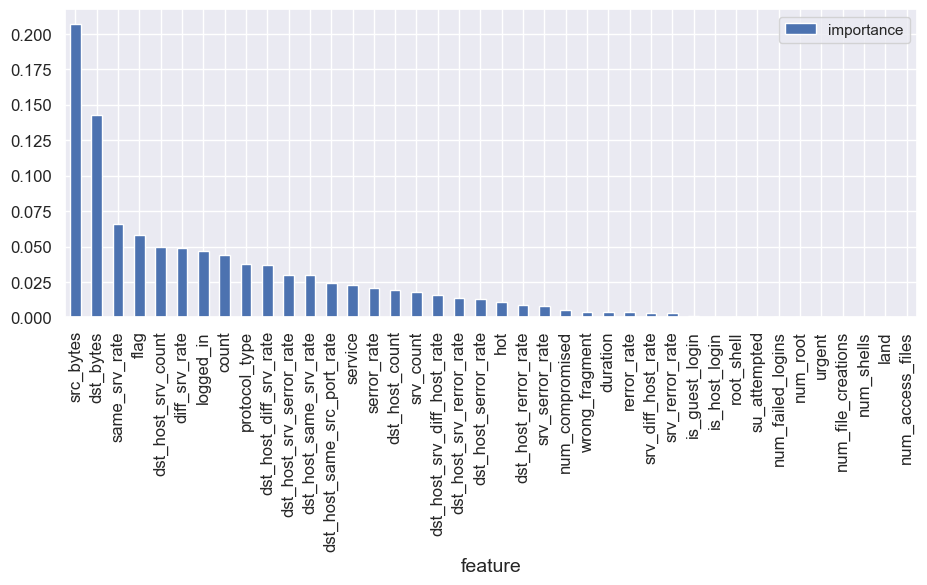

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [47]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

### DATASET PARTITION

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

### FITTING MODELS

In [49]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### EVALUATE MODELS

In [50]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071666840303904

Model Accuracy:
 0.9071679709651809

Confusion matrix:
 [[7000 1245]
 [ 392 8997]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.85      0.90      8245
      normal       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9960869883971739

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

### VALIDATING MODELS

In [51]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.906721354855782

Confusion matrix:
 [[2981  517]
 [ 188 3872]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.85      0.89      3498
      normal       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.9947075946017465

Confusion matrix:
 [[3483   15]
 [  25 4035]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      3498
      normal       1.00      0.99      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99   

In [52]:
# PREDICTING FOR TEST DATA using KNN
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

## CHALLENGING QUESTIONS

### Q1. Where does ZeroAcess occur? Are there any patterns?

It seems that infection rates are more concentrated on densely populated and high internet penetration areas such as North America, Europe, South East Asia, Middle East and India.

It aligns with the more general trend of cyberattacks where dense urban areas serve as hubs for businesses with greater internet connectivity and financial assets that are tempting targets for such type of attacks. 

But there are also some outliers in the pictures for example Pakistan which is not a developed country but probably is facing low security protection that make it a good target for possible attacks or there is a military and political motivation behind it. 

There are also other developed countries such as Italy which show outsized ranking based on the weight of their economy and that can indicate a low security issue which make tempting and easier an attack.

United States represents the larger market for ZeroAccess attacks and we can see from the analysis that also here the densiest urban and financial areas are the main playground for those attacks.



### Q2. Are there any specific types of users that are easily affected? Is education or income affect its infection rate?

Based on the results of the analysis there is no direct evidence to suggest that a specific type of users is more affected.

There are cases of both high-income and low-income countries with hight infection rates and viceversa. This could mean that other factors have an influence here such as internet access, security practices and infrastructure.

There are some trends though that can play a role:

Higher income individuals may be more likely to access higher speed internet and use multiple devices and therefore be a more attractive target for hackers.

Education does not seem to be a primary determinant though indirectly more educated individuals are higher earners while low educated individuals may not be aware of cybersecurity issues and these could be factors that may influence the spread of ZeroAccess.



### Q3. Plot a figure to show the number of attacks in the top 5 countries with respect to the number of attacks.

In [53]:
#plot figure of the number of attacks in the top 5 countries with respect to the number of attacks

country_num = df.groupby(['country_code']).size().sort_values(ascending=False)
country_num = country_num[country_num.values.argsort()[-5:][::-1]]
plt.figure(figsize=(16,3))
plt.title("Top 5 Countries by Number of Attacks")
plt.ylabel("Number of Attacks")
plt.xlabel("Country")
plt.bar(country_num.index, country_num.values, width=0.6)
plt.xticks(rotation='vertical')
plt.show()



### Q4. Which state and city have a severe attack? and why? 

The state with the highest values are Peabody, Kansas London, England , Tokyo and Islamabad.

For London and Tokyo the results are to be expected, they are both major financial centers and densely populated, highly connected A class cities.

Peabody, Kansas and Islamabad are a different story.

Peabody, Kansas is a small rural town of less than 1000 inhabitants there might have been a specific single attack to some key infrastructure, news reported major attacks across Kansas which targeted low security companies and government offices and Peabody could be part of this larger scheme affecting Kansas although more research on the causes is due.

Islamabad is the capital of Pakistan and although not as developed and affluent as London and Tokyo could have been a desired target for military or political reasons or maybe being a low security country it could be considered a soft target.

### Q5. What do you get from the following code snippet and why? Explain the output with logic.
Hint: compare the population to attack proportion.

It creates two dataframes us_count and us_pop storing the numbers of ZeroAccess attacks and the population of each state.

Then it calculates the proportion of attacks to the population of each state and compare them.

us_count dataframe contains the number of ZeroAccess attacks for each state.

The att_pc column calculate the proportion of attacks for each state by dividing the attack column by the attack.sum() column therefore calculating the percentage of ZeroAccess attacks in a specific state.



In [54]:
us_count = us_df.groupby('State').size().sort_values(ascending=False).reset_index()
us_count.columns = ['state','attack']
us_count['att_pc'] = us_count['attack']/us_count.attack.sum()
us_count = us_count.set_index(us_count['state'])
us_count.drop(['state'],axis=1,inplace=True)

us_count

attack    att_pc
state                             
California          2293  0.095593
Texas               2003  0.083504
Florida             1425  0.059407
Kansas              1371  0.057156
New York            1315  0.054821
Pennsylvania         970  0.040439
Illinois             948  0.039521
Ohio                 914  0.038104
Georgia              841  0.035061
North Carolina       759  0.031642
Michigan             715  0.029808
New Jersey           669  0.027890
Virginia             526  0.021929
Arizona              503  0.020970
Washington           502  0.020928
Missouri             480  0.020011
Wisconsin            472  0.019677
Indiana              458  0.019094
Massachusetts        453  0.018885
Maryland             430  0.017926
Tennessee            425  0.017718
Alabama              412  0.017176
Minnesota            405  0.016884
Colorado             394  0.016426
South Carolina       386  0.016092
Kentucky             373  0.015550
Louisiana            366  0.015258
Oklahoma             293  0.012215
Arkansas             262  0.010923
Mississippi          241  0.010047
Oregon               235  0.009797
Iowa                 228  0.009505
Connecticut          226  0.009422
Nevada               187  0.007796
Utah                 164  0.006837
West Virginia        161  0.006712
Nebraska             144  0.006003
New Mexico           133  0.005545
Maine                113  0.004711
Idaho                 99  0.004127
New Hampshire         98  0.004086
Montana               83  0.003460
Rhode Island          77  0.003210
Hawaii                73  0.003043
South Dakota          69  0.002877
Delaware              68  0.002835
Washington, D.C.      57  0.002376
North Dakota          53  0.002210
Alaska                46  0.001918
Wyoming               38  0.001584
Vermont               31  0.001292

The us_pop dataframe contains the population for each state.

pop_pc column calculates the proportion of the population for each state by dividing the population column by the population.sum() column therefore pop_pc columnn represents the percentage of the total population in the state.

In [55]:
us_pop = state_df[['state','population']]
us_pop['pop_pc'] = state_df.population/state_df.population.sum()
us_pop = us_pop.set_index(us_pop['state'])
us_pop.drop(['state'],axis=1,inplace=True)
us_pop

population    pop_pc
state                                     
Alabama                  4758191  0.015438
Arizona                  6665093  0.021625
Arkansas                 2919815  0.009473
California              37350092  0.121181
Colorado                 5077553  0.016474
Connecticut              3555261  0.011535
Delaware                  894424  0.002902
District of Columbia      605959  0.001966
Florida                 18732783  0.060778
Georgia                  9932505  0.032226
Idaho                    1562046  0.005068
Illinois                13046084  0.042327
Indiana                  6490613  0.021058
Iowa                     3039465  0.009861
Kansas                   2848369  0.009241
Kentucky                 4359450  0.014144
Louisiana                4539283  0.014727
Maine                    1332155  0.004322
Maryland                 5759373  0.018686
Massachusetts            6662878  0.021617
Michigan                10074498  0.032686
Minnesota                5321556  0.017266
Mississippi              2983018  0.009678
Missouri                 6050503  0.019631
Montana                   985235  0.003197
Nebraska                 1815500  0.005890
Nevada                   2670861  0.008665
New Hampshire            1338495  0.004343
New Jersey               8799248  0.028549
New Mexico               2030790  0.006589
New York                19746813  0.064068
North Carolina           9479467  0.030756
North Dakota              653642  0.002121
Ohio                    11663946  0.037843
Oklahoma                 3725797  0.012088
Oregon                   3865861  0.012543
Pennsylvania            12737230  0.041325
Rhode Island             1064277  0.003453
South Carolina           4609176  0.014954
South Dakota              820920  0.002663
Tennessee                6362421  0.020643
Texas                   25042738  0.081250
Utah                     2813835  0.009129
Vermont                   628294  0.002038
Virginia                 7965428  0.025843
Washington               6734229  0.021849
West Virginia            1838901  0.005966
Wisconsin                5714200  0.018539
Wyoming                   549990  0.001784

Conclusions
comparing att_pc and pop_pc columns we can see that the number of ZeroAccess attacks is distributed relative to the population of each state.

California which has the higher percentage of the population has also the higher percentage of attacks.


### Q6. How is the attack or infection rate in each state related to the state population? What is the best plot to present these results with? Plot it and explain the output with a valid explanation.

As mentioned above there is a correlation between rate of attack and population. 

I think the best plot is the scatter plot which show clearly the correlation between the two. 

The results are clearly showing a positive correlation.



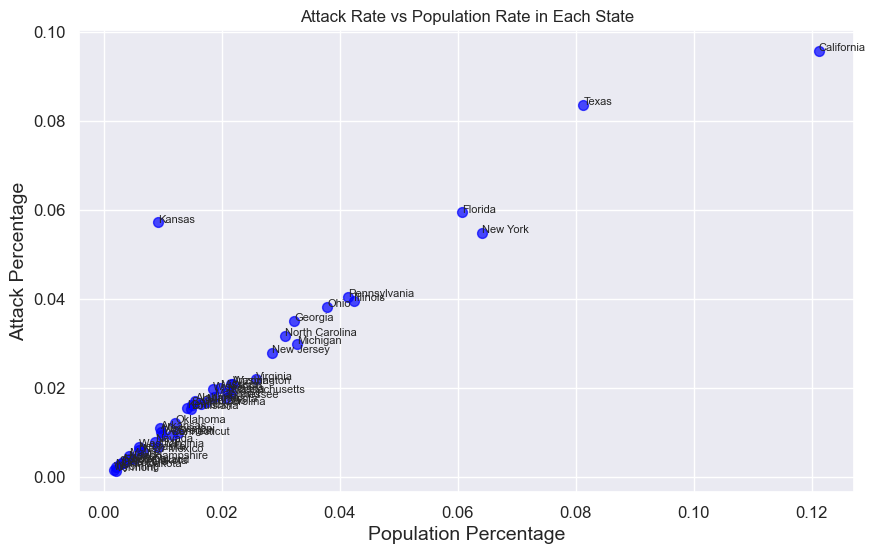

In [56]:
import matplotlib.pyplot as plt

# Merge the two DataFrames on the 'state' column
merged_df = pd.merge(us_count, us_pop, left_index=True, right_index=True)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['pop_pc'], merged_df['att_pc'], s=50, color='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Population Percentage')
plt.ylabel('Attack Percentage')
plt.title('Attack Rate vs Population Rate in Each State')

# Annotate each point with the state name
for i, txt in enumerate(merged_df.index):
    plt.annotate(txt, (merged_df['pop_pc'][i], merged_df['att_pc'][i]), fontsize=8, ha='left')

plt.grid(True)
plt.show()


### Q7. Plot interactive bar plot for top 20 worst affected countries by covid-19 till date which shows the actual number of deaths and recovered covid-19 patients in that affected country based on hovering the mouse over the bar for that country.

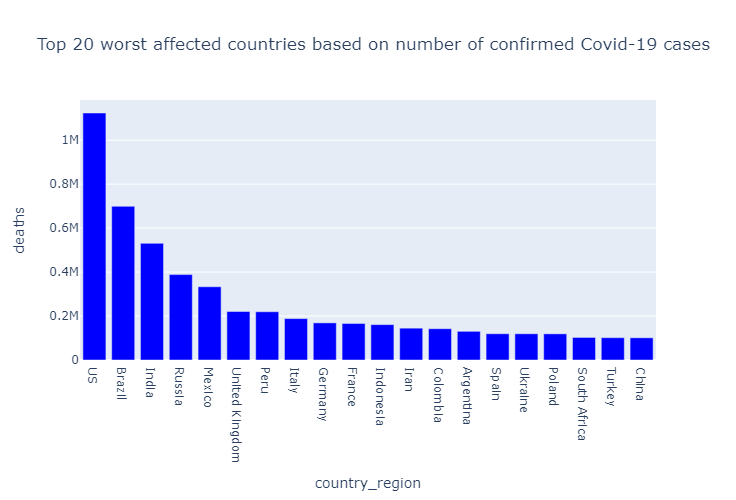

In [57]:
#plot an interactive bar plot with the actual number of confirmed cases 
import plotly.express as px

sorted_country_df1 = country_df.sort_values('deaths', ascending = False).head(20)
sorted_country_df1

px.bar(
    sorted_country_df1.head(20),
    x = "country_region",
    #unable to use the recovered value 
    #since the dataset link provided from the website is showing all NaN values for recovered column
    y = "deaths",
    title = "Top 20 worst affected countries based on number of confirmed Covid-19 cases",
    color_discrete_sequence=["blue"],
    height = 500,
    width = 800
)


